# **Final Project Part 2** 

## Loading the Data Set

In [220]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 

In [221]:
%matplotlib inline

In [222]:
#load in birthday data set 
birthday_compiled = pd.read_csv('Birthday_compiled.csv')

In [223]:
# taking a look at birthday data set
birthday_compiled.head()

,Tagging ID,Day,Ai_trk,GP Job Name,Impressions,Media Cost,visits,Call Leads,Web Leads
0,4348319SOC-BDA1-C1,18-Jan-19,19SOC-BDA1-C1,Age-In NTM Social Facebook (64+6 mo) Free Guide,333,$5.85,3.0,NaN,NaN
1,4348319SOC-BDA1-C2,18-Jan-19,19SOC-BDA1-C2,Age-In NTM Social Facebook (64+6 mo) Three Mon...,340,$6.87,3.0,0.0,NaN
2,4348319SOC-BDA1-C3,18-Jan-19,19SOC-BDA1-C3,Age-In NTM Social Facebook (64+6 mo) Carousel,156,$2.15,2.0,NaN,NaN
3,4348319SOC-BDA2-C3,18-Jan-19,19SOC-BDA2-C3,Age-In NTM Social Facebook (64+9 mo) Image Car...,303,$6.00,NaN,NaN,NaN
4,4348319SOC-BDA3-C1,18-Jan-19,19SOC-BDA3-C1,Age-In NTM Social Facebook (64+11mo) See Any D...,177,$1.56,NaN,NaN,NaN


In [5]:
birthday_compiled.isnull().sum()

Tagging ID        1
Day               1
Ai_trk            1
GP Job Name       1
Impressions       1
Media Cost        0
visits          676
Call Leads     2016
Web Leads      2017
dtype: int64

**I decided to combine web leads and call leads in to a total leads cell to get a better idea of the total leads as this is what my client is more interested in. There is potential to go more granular and look at just web leads vs. call leads**

In [224]:
print(birthday_compiled.loc[:,'Web Leads'].sum())
print(birthday_compiled.loc[:,'Call Leads'].sum())

461.0
49.0


In [225]:
birthday_compiled['Total Leads'] = birthday_compiled['Call Leads'] + birthday_compiled['Web Leads']

In [226]:
#taking a look with new total leads column 
birthday_compiled.head()

,Tagging ID,Day,Ai_trk,GP Job Name,Impressions,Media Cost,visits,Call Leads,Web Leads,Total Leads
0,4348319SOC-BDA1-C1,18-Jan-19,19SOC-BDA1-C1,Age-In NTM Social Facebook (64+6 mo) Free Guide,333,$5.85,3.0,NaN,NaN,NaN
1,4348319SOC-BDA1-C2,18-Jan-19,19SOC-BDA1-C2,Age-In NTM Social Facebook (64+6 mo) Three Mon...,340,$6.87,3.0,0.0,NaN,NaN
2,4348319SOC-BDA1-C3,18-Jan-19,19SOC-BDA1-C3,Age-In NTM Social Facebook (64+6 mo) Carousel,156,$2.15,2.0,NaN,NaN,NaN
3,4348319SOC-BDA2-C3,18-Jan-19,19SOC-BDA2-C3,Age-In NTM Social Facebook (64+9 mo) Image Car...,303,$6.00,NaN,NaN,NaN,NaN
4,4348319SOC-BDA3-C1,18-Jan-19,19SOC-BDA3-C1,Age-In NTM Social Facebook (64+11mo) See Any D...,177,$1.56,NaN,NaN,NaN,NaN


### Create Preliminary Models for Data



In [228]:

#first getting rid of uneeded columns to take a better look at the data 

bday_noid = birthday_compiled.drop(columns = 'Tagging ID')
bday_noid = bday_noid.drop(columns = 'Ai_trk')
bday_noid = bday_noid.drop(columns = 'GP Job Name')



In [229]:
#re-working the data to not include any objects
bday = bday_noid[bday_noid.columns[1:]].replace('[\,]', '', regex=True).astype(object)

**I decided to drop the dollar sign seperately as it was giving me trouble in the object astype section**

In [286]:
bday['Media Cost'] = bday['Media Cost'].str.replace('$', '')

In [287]:
#bday.convert_objects(convert_numeric=True).head()

In [308]:
bday["Impressions"] = pd.to_numeric(bday["Impressions"])
bday["Media Cost"] = pd.to_numeric(bday["Media Cost"])

In [309]:

#this is me dropping the last row of data because it was giving me issues as it was completely blank of datas 
bday = bday[:-1]
bday = bday.fillna(0)

# Splitting columns into target and features
target_col='Total Leads'
y = bday.loc[:,target_col]

feature_cols = 'Impressions', 'visits', 'Media Cost'
X = bday.loc[:,feature_cols]

In [310]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [311]:
from sklearn.linear_model import LinearRegression 

In [312]:
lr= LinearRegression()

In [313]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [314]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, lr.predict(X_train)))
print(mean_squared_error(y_test, lr.predict(X_test)))

#y_pred = lr.predict(X_test)
#np.sqrt(mean_squared_error(y_test, y_pred))

0.49980948458669366
0.6786613801365133


In [315]:
# Evaluating the model 
print('Test Data R-Squared:', lr.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.06205943300430272
Training Data R-Squared: 0.15206020843815815
Test Data RMSE: 0.8238090677678375
Test Data MAE: 0.4041375076892817


### Evaluating the models

This looks like the model is underfitting as the rsquared value is 15% - it is too simple to explain the variance in the data. I think the model itself needs more parameters in order to successfully fit the model and create less bias to make it more complex. 
- Create more features/ add in new variables 
- I could drop features that might not be relevant like the impressions as they are much higher than the rest of the values or look at media spend with impressions seperately from visits to understand lead performance. 
- Potential to look at a different model to see if it performs better


#### **Exploring the Data** 

In [316]:
#taking a look at the shape of the data
bday.shape

(2281, 6)

In [317]:
#looking at the data types of each column 
#first looking at the big data set
print(birthday_compiled.dtypes)

Tagging ID      object
Day             object
Ai_trk          object
GP Job Name     object
Impressions     object
Media Cost      object
visits         float64
Call Leads     float64
Web Leads      float64
Total Leads    float64
dtype: object


In [318]:
#then looking at the abbreviated data 
print(bday.dtypes)

Impressions      int64
Media Cost     float64
visits         float64
Call Leads     float64
Web Leads      float64
Total Leads    float64
dtype: object


Taking a look at the descriptive statistics 

In [319]:
bday.describe()


,Impressions,Media Cost,visits,Call Leads,Web Leads,Total Leads
count,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000
mean,388.467339,9.111933,2.174046,0.021482,0.202104,0.223586
std,414.667730,9.679515,2.598912,0.170071,0.763714,0.789729
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.000000,3.050000,0.000000,0.000000,0.000000,0.000000
50%,276.000000,6.980000,1.000000,0.000000,0.000000,0.000000
75%,509.000000,11.820000,3.000000,0.000000,0.000000,0.000000
max,5064.000000,119.830000,20.000000,3.000000,10.000000,10.000000


The above shows that there are technically 'no' missing values however that is because I have filled them with 0. There are 2286 observations in the data and all of the columns are numerical including the monetary value that I have removed the object from 


### Looking at Graphs of the data 


#### Boxplot

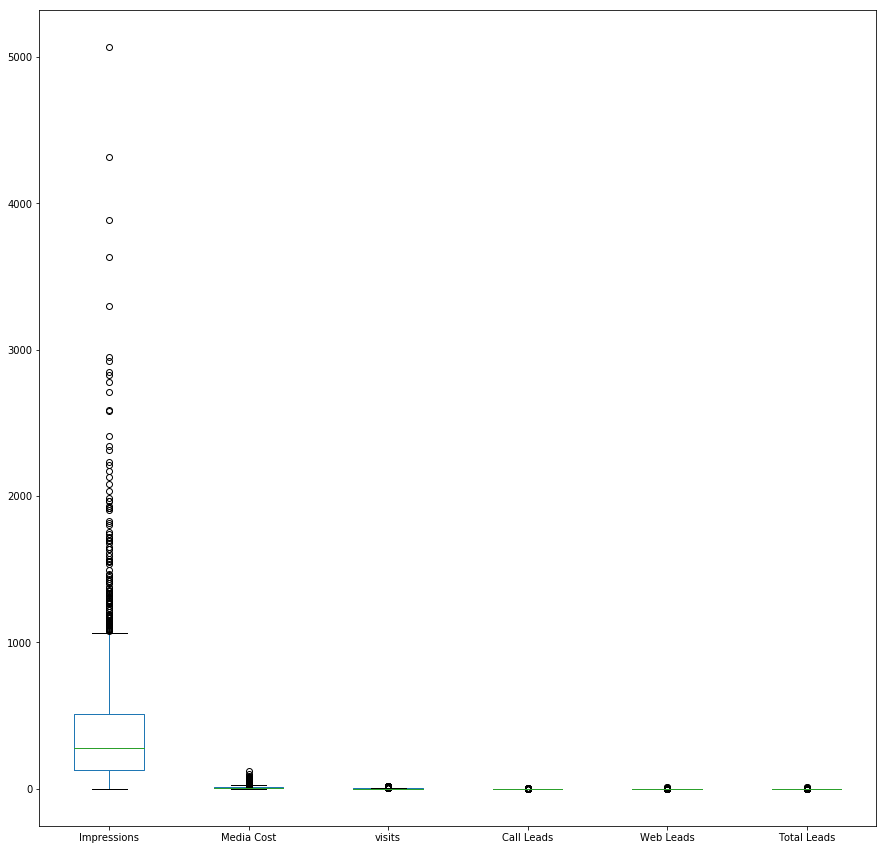

In [320]:
ax = bday.plot(kind='box', figsize=(15, 15))

impressions seem to be the outlier here in terms of having an exponentially greater amount of impressions as compared to leads (which I expected)

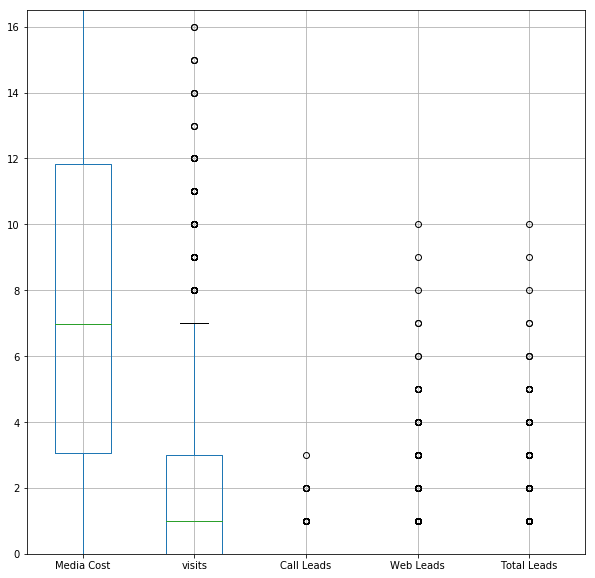

In [321]:
# Adjusting to look at this without impressions 
ax2 = bday.drop(['Impressions'], axis = 1).plot(kind='box', figsize=(10, 10), grid = True) 
ax2.set_ylim(0,16.5);

It might make sense to go in and add in other variables to look at leads as compared to media cost and visits with something else or figure out how to adjust impression volume to work with the amount of visits and Media Cost 

In this data I am thinking the numbers might need to be tweaked as the total leads is always going to be much lower than that of impressions and hard and or a different model

#### Looking at Histograms 

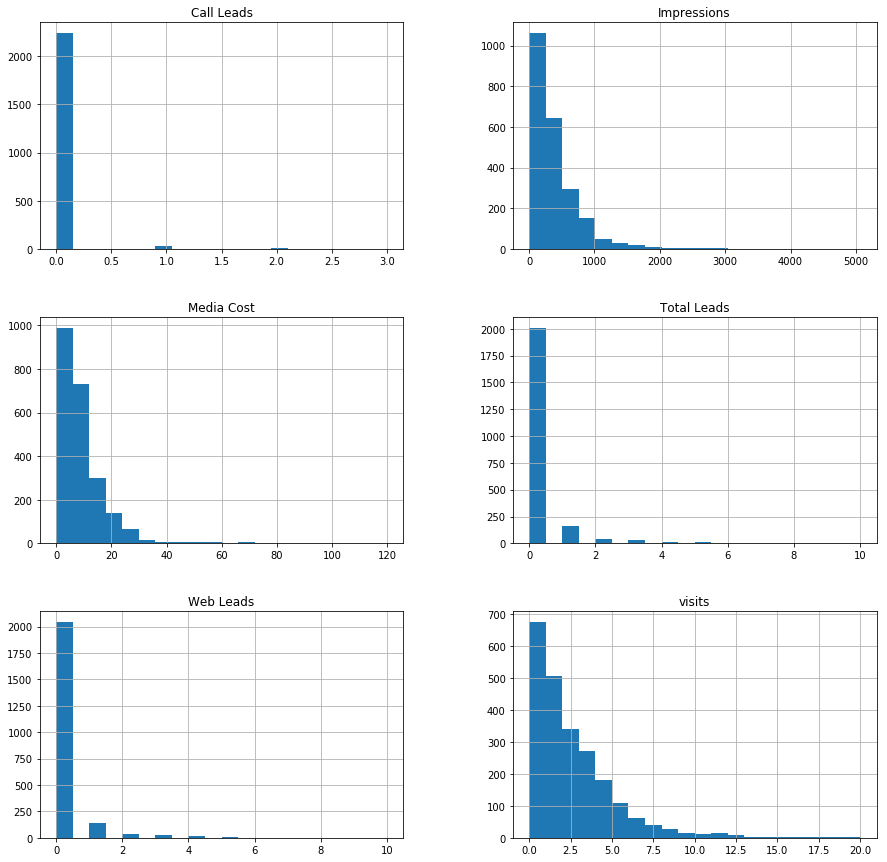

In [325]:
ax3 = bday.hist(figsize=(15,15), bins = 20) 


The variables all appear to be right skewed, which makes sense as it accounts for the number of zero valyes in leads, web leads and call leads.

#### Looking with Heat Maps

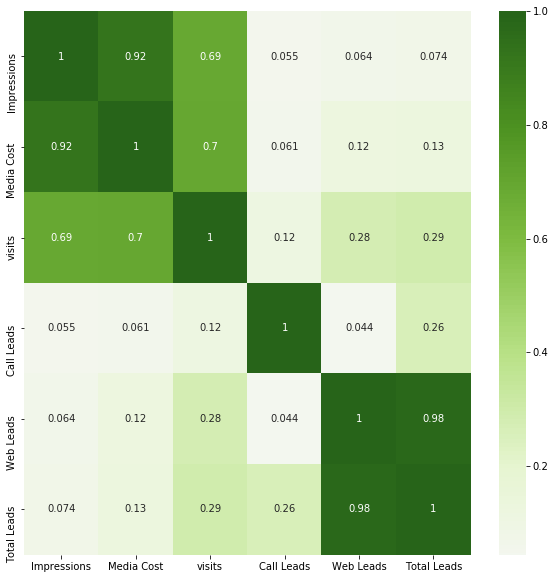

In [326]:
fig, ax4 = plt.subplots(figsize=(10,10))         
sns.heatmap(bday.corr(), center=0, cmap="PiYG", annot = True, ax = ax4);

This shows me that media cost and impressions are more positively correlated than that of call or web leads. Total leads is more positively correlated to impressions than the individual leads as it is the sum of all leads. There are not any negative correlations which makes sense based on their linear relationship. The more impressions, the more spend is happening in the Facebook platform 

Utilizing Seaborn 

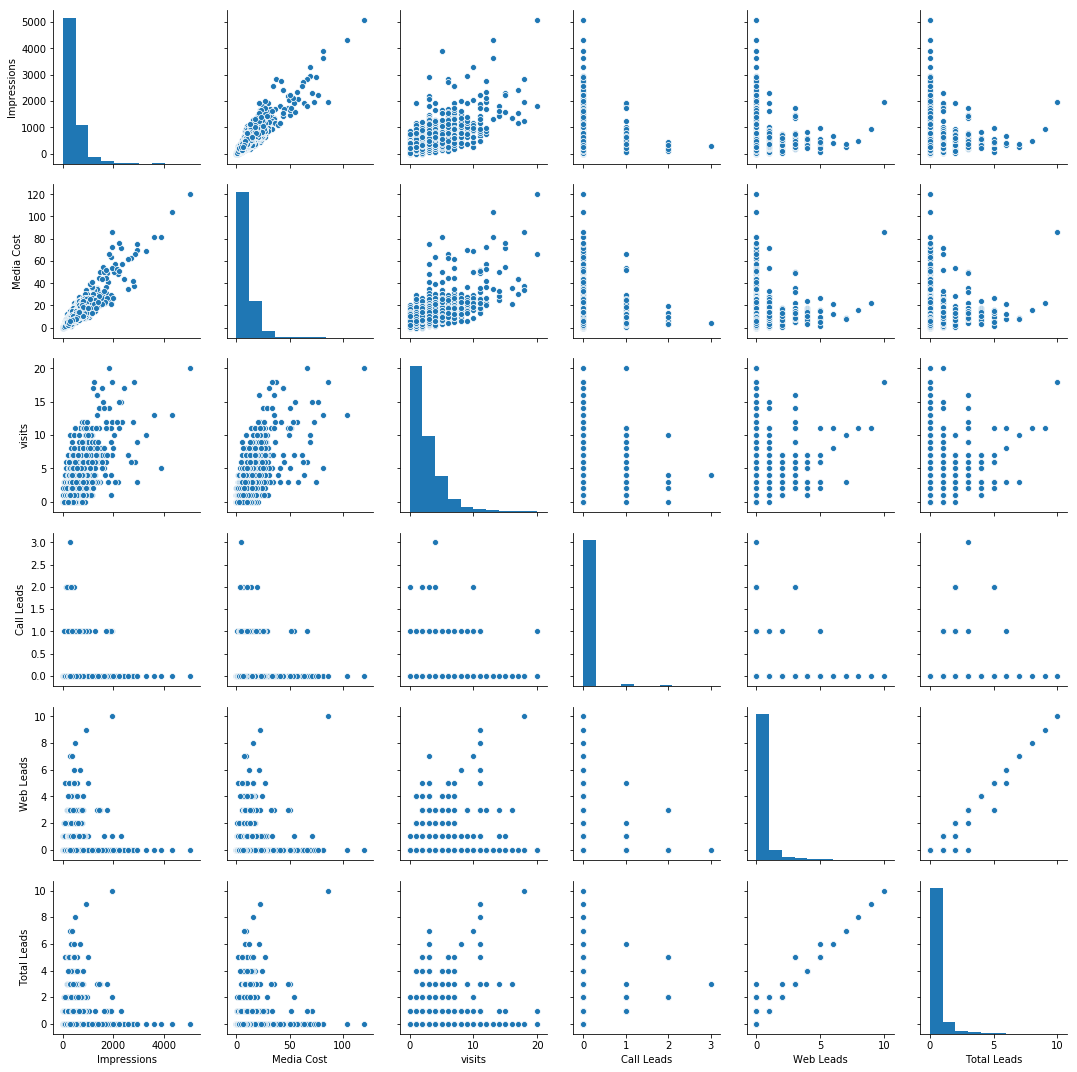

In [327]:
g = sns.pairplot(bday) # Create scattermatrix of all variables to visualize relationships


## Final Observations 

- #### Shortcomings of your data
- #### Any assumptions that you will need to make in light of those shortcomings
- #### At least five things you might try as ways to improve your model.
- #### What you think is the most appropriate metric for evaluating the models you will build

- I believe the shortcomings of my data is the difference in range of numerical values. Do to the fact that impressions will always be at a higher volume of data than leads it will appear to be skewed, unless I can scale the impression value to better fit the data. I also believe it would be helpful to use other variables to help identify the spend that is needed for these social ads. 
- I believe I should assume that there will always be some skewedness to my data based on the values being measured and the definitions for those values from my company and the facebook platform 
- I think some of the things I have listed above would help improve my model like:
    - adding more complexity to the model, scaling the impressions variable, organizing the data into specific ads rather than using daily data, working on how I split data in the train test split by using k-fold, looking at different models that would help display this data in a more useful way
    
- I belive If I continue using linear regression or a different kind of regression model utilizing the R squared function would be the most useful metric for evaluation purposes. 
    - I have thought of looking at a classification model